 **Welcome to the (TMDb) Dataset Investigation project!**

# Project: Investigate TMDb Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 



This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Column names:
>* ID for each movie.
>* Popularity.
>* Budget. 
>* Revenue.
>* original title.
>* Cast.
>* Homebage: link for the movie.
>* Director.
>* Tagline: a slogan for the movie.
>* Keywords.
>* Overview: a brief of the movie story.
>* Runtime: playtime of the movie.
>* Genres: type of the movie.
>* Production company.
>* Release date: date of production.
>* Vote count: number of votes.
>* Vote average: average of votes given to the movie.
>* Release year: year of production.
>* Budget adj: show the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>* Revenue adj: show the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Questions for Analysis
>* Is movies production increase by years?
>* Are new movies upgrading and become more popular?
>* Which genres are most popular from year to year?
>* Is high budget gives more revenue?
>* What kinds of properties are associated with movies that have high revenues?

In [22]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
%matplotlib inline

In [12]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> View some rows of data, shape of the data set and data types.


In [25]:
# Load data and print out a few lines.
df = pd.read_csv("tmdb_movies.csv").set_index('id')
df.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


See how many columns and rows in the data.

In [26]:
df.shape

(10866, 20)

See columns names and data types.

In [27]:
# Columns names and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       


### Data Cleaning
After discussing the structure of the data 
now let's look for null values, duplicated rows, possibly errant data or any problems that need to be cleaned.

 

### Clean checking function: 
Let's make a function that check for null values, duplicated rows and wether column names in small letters or not.
we will assign column names to variable called "columns" then we will loop through every column to check for null values and check are they small letters or need to be changed and we will go through the data to check if there is duplicated rows or not.

In [28]:
def clean(df):
    columns = df.columns
    # iterate through columns to check for null values
    for column in columns:
        if df[column].isnull().sum() > 0:
            print("There is some null values in the data")
            break
        else:
            print("No null values in the data")
            break
    # check for duplication
    if df.duplicated().sum() > 0:
        print("There is duplication\n")
    else:
        print("No duplication\n")
    # iterate through columns to check are they in lowercase or not
    for column in columns:
        if column != column.lower():
            print("You need to change columns to small letters.\n")
            break
        else:
            print("Columns are already small.\n")
            break

Let's check the data with **clean( )** function.

In [29]:
clean(df)

There is some null values in the data
There is duplication

Columns are already small.



Let's see how many null values in each column.

In [30]:
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can remove homepage, tagline, production companies and keywords columns as it conatin huge number of null values and dropping them won't affect our analysis.

In [31]:
df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis = 1, inplace = True)
df.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Dropping rows contain sum null values (few number of rows)

In [32]:
df.dropna(inplace=True)

Remove duplicated rows

In [33]:
df.drop_duplicates(inplace=True)

Check after fixing the data.

In [34]:
clean(df)

No null values in the data
No duplication

Columns are already small.



Check if budget columns or revenue columns have zero values which doesn't make sense that a movie has zero budget or zero revenue.

In [13]:
df.query('budget == 0').head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,6/19/15,425,6.4,2015,0.0,2.700677e+07
339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.0,2.056620e+07


In [14]:
df.query('budget_adj == 0').head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,6/19/15,425,6.4,2015,0.0,2.700677e+07
339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.0,2.056620e+07


In [16]:
df.query('revenue == 0').head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
265208,tt2231253,2.932340,30000000.0,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015,2.759999e+07,0.0
334074,tt3247714,2.331636,20000000.0,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,5/21/15,280,5.4,2015,1.839999e+07,0.0


In [18]:
df.query('revenue_adj == 0').head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
265208,tt2231253,2.932340,30000000.0,4.034621e+07,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015,2.759999e+07,0.0
334074,tt3247714,2.331636,20000000.0,4.034621e+07,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,5/21/15,280,5.4,2015,1.839999e+07,0.0


We found zeroes in budget and revenues. This could give a misleading results so we have to fix this.
We can replace zeroes with the average to give more accebtable results.

We will make a function to replace zero values with the average of the column.

In [35]:
def fix_zero(df):
    df.replace(to_replace = 0, value = df.mean(), inplace=True)

In [36]:
fix_zero(df['budget'])
fix_zero(df['budget_adj'])
fix_zero(df['revenue'])
fix_zero(df['revenue_adj'])

Let's check if there is any other zeroes left.

In [17]:
df.query('budget == 0').head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,


In [18]:
df.query('budget_adj == 0').head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,


In [19]:
df.query('revenue == 0').head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,


In [20]:
df.query('revenue_adj == 0').head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,


Now let's fix data type of release date and convert it from string to datetime.

In [37]:
df['release_date'] = pd.to_datetime(df['release_date'])

Another check of data types.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 135397 to 22293
Data columns (total 16 columns):
imdb_id           10724 non-null object
popularity        10724 non-null float64
budget            10724 non-null float64
revenue           10724 non-null float64
original_title    10724 non-null object
cast              10724 non-null object
director          10724 non-null object
overview          10724 non-null object
runtime           10724 non-null int64
genres            10724 non-null object
release_date      10724 non-null datetime64[ns]
vote_count        10724 non-null int64
vote_average      10724 non-null float64
release_year      10724 non-null int64
budget_adj        10724 non-null float64
revenue_adj       10724 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(6)
memory usage: 1.4+ MB


We removed some columns which will not affect our analysis, dropped few rows with messing values, fixed some data types and filled zero values with the average, So we have our cleaned data which we can manebulate and analyze.

<a id='eda'></a>
## Exploratory Data Analysis
Let's explore our data with questions we intende before:
>* Is movies production increase by years?
>* Are new movies upgrading and become more popular?
>*  Which genres are most popular from year to year?
>* What kinds of properties are associated with movies that have high revenues?





Let's have a general look to stasistics of our data at first.

In [22]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10724.000000,1.072400e+04,1.072400e+04,10724.000000,10724.000000,10724.000000,10724.000000,1.072400e+04,1.072400e+04
mean,0.652858,2.251004e+07,6.247191e+07,102.503450,219.943305,5.964407,2001.254196,2.701346e+07,8.057881e+07
std,1.005072,2.814647e+07,1.116589e+08,30.460109,578.981655,0.930163,12.822467,3.064246e+07,1.373342e+08
min,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210766,1.481331e+07,4.017865e+07,90.000000,17.000000,5.400000,1995.000000,1.777690e+07,5.204018e+07
50%,0.387247,1.481331e+07,4.034621e+07,99.000000,39.000000,6.000000,2006.000000,1.777690e+07,5.204018e+07
75%,0.721577,1.600000e+07,4.034621e+07,112.000000,148.250000,6.600000,2011.000000,2.113258e+07,5.204018e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Let's have a visual statistics of our data by histograms for numerical values in columns.

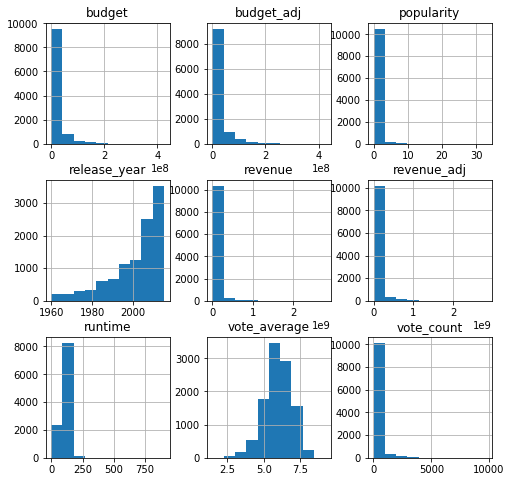

In [23]:
df.hist(figsize= (8,8));

### Research Question 1 : Is movies production increase by years?

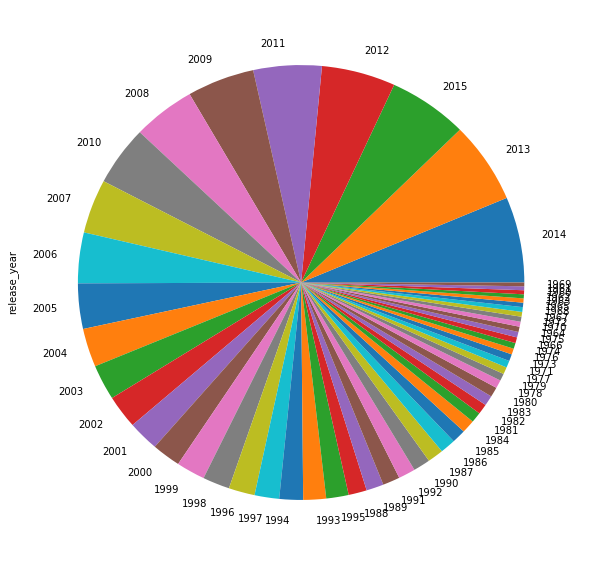

In [24]:
df.release_year.value_counts().plot(kind='pie', figsize= (10,10));

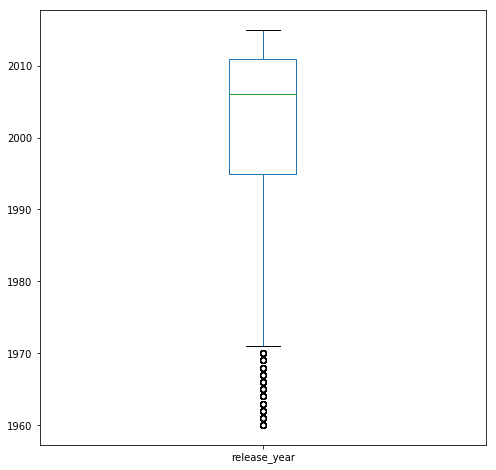

In [48]:
df['release_year'].plot(kind = 'box', figsize=(8,8));

We can see that Number of movies increses year by year.

### Research Question 2 : Which genres are most popular from year to year?

To analyze genres and see popularity of these genres we will split the genres column and make new data frame contining each type separeted to analyze.

Splitting the multiple genres entries into separate columns and verifying successful separation.

In [39]:
genres_df = df['genres'].str.split("|", expand=True)
 
genres_df.head()

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


Creating a separate dataframe form unique genres records.

In [40]:
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

Renaming the genres column and verifying the genres value count.

In [41]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df.genres_adj.value_counts()

Drama              4744
Comedy             3774
Thriller           2902
Action             2371
Romance            1707
Horror             1636
Adventure          1463
Crime              1353
Science Fiction    1217
Family             1213
Fantasy             905
Mystery             808
Animation           662
Documentary         470
Music               398
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres_adj, dtype: int64

Now we can make a visual analysis.

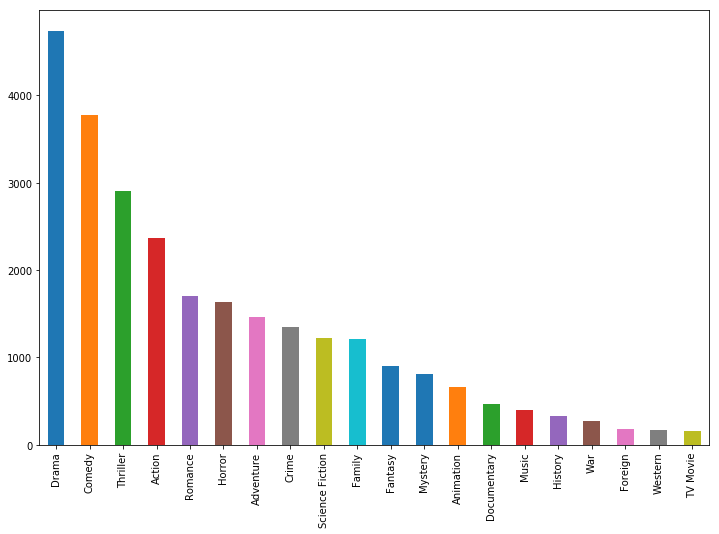

In [45]:
genres_df.genres_adj.value_counts().plot(kind='bar', figsize= (12,8));

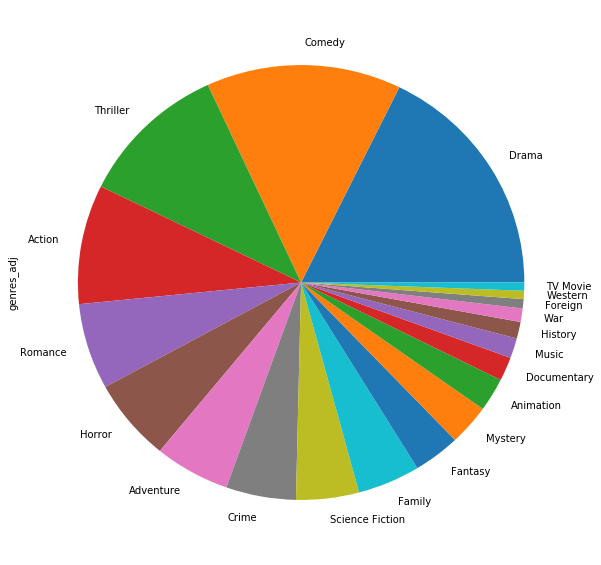

In [31]:
genres_df.genres_adj.value_counts().plot(kind='pie', figsize= (10,10));

 AS we can see most popular genres from year to year are:
* Drama.
* Comedy.
* Thriller.
* Action.
* Romance.

Then come the otehr genres.

### Research Question 3: What kinds of properties are associated with movies that have high revenues?

See revenue stasitics.

In [31]:
df.revenue.describe()

count    1.072400e+04
mean     6.247191e+07
std      1.116589e+08
min      2.000000e+00
25%      4.017865e+07
50%      4.034621e+07
75%      4.034621e+07
max      2.781506e+09
Name: revenue, dtype: float64

See the statistics of some variables associated with high revenues movies.

In [33]:
df.loc[df.revenue > df['revenue'].mean()].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1687.000000,1.687000e+03,1.687000e+03,1687.000000,1687.000000,1687.000000,1687.000000,1.687000e+03,1.687000e+03
mean,1.827386,6.021731e+07,2.220412e+08,113.473622,961.407232,6.310077,2002.708951,6.840672e+07,2.755741e+08
std,1.949472,5.063835e+07,2.188727e+08,24.915451,1144.699834,0.728145,10.021392,5.167029e+07,2.670701e+08
min,0.010335,1.130000e+02,6.249371e+07,44.000000,10.000000,3.400000,1961.000000,2.248029e+02,5.785150e+07
25%,0.860337,2.380000e+07,9.531526e+07,98.000000,258.000000,5.800000,1998.000000,2.885424e+07,1.136794e+08
50%,1.309249,4.500000e+07,1.479342e+08,110.000000,551.000000,6.300000,2005.000000,5.525569e+07,1.820694e+08
75%,2.119148,8.000000e+07,2.572738e+08,125.000000,1168.500000,6.800000,2010.000000,9.473583e+07,3.339512e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


See stistics by visualiztion with histograms.

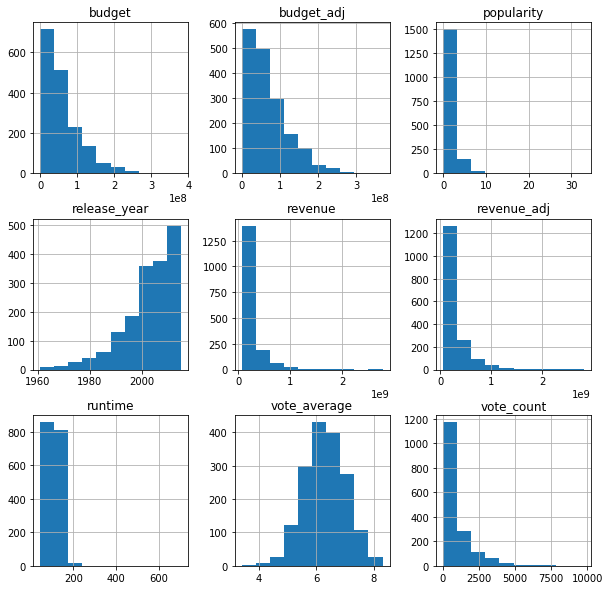

In [34]:
df.loc[df.revenue > df['revenue'].mean()].hist(figsize=(10,10));

As we can see in theses histograms :
> Releas year histogram is left skewed while vote average is normal distrebuted.
>* High revenues movies have run time below 200 minutes.
>* Movies business grows by time, year over year movies gives more revenues as we see in the left skewed histogram of release year.


### Research Question 4: Is there a correlation between budget and revenues ?

correlation : (0.70478404627123437, 0.0)


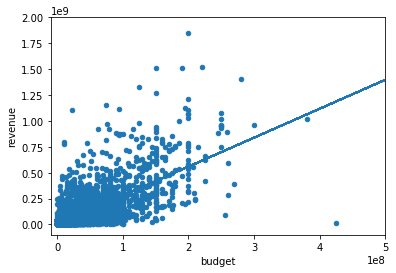

In [52]:
model = sm.OLS(df.revenue, sm.add_constant(df.budget))
p = model.fit().params
x = df.revenue
ax = df.plot(x='budget', y='revenue', kind='scatter')
ax.plot(x, p.const + p.budget* x)
ax.set_xlim([-10000000, 500000000])
ax.set_ylim([-100000000, 2000000000])
print("correlation :", scipy.stats.pearsonr(df.budget, df.revenue))

We can see that there is a positive correlation between budget and revenue.

### Research Question 5: What is the correlation between releasing year and votes and revenues?

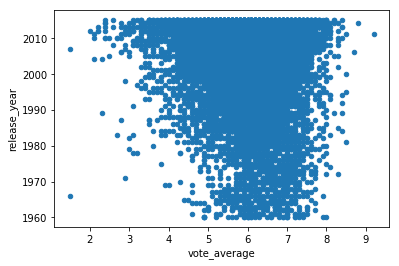

In [54]:
df.plot(x="vote_average", y="release_year", kind="scatter");

We see that votes are more with newer movies.

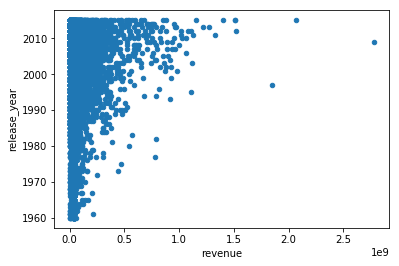

In [37]:
df.plot(x="revenue", y="release_year", kind="scatter");

We see that newer movies associated with higher revenues.

By time movies upgrading, taking more votes, have much more pupularity and give more revenues, so this bisness become more popular and profitable.

<a id='conclusions'></a>
## Conclusions

we have a data set contains about 10,000 movies. After cleaning the data and making some statistics, we saw that movies production increases year by year and movies become more popular and profitable.
And we can see that most popular movies genres are: 
>* Drama              
>* Comedy             
>* Thriller           
>* Action             
>* Romance            
>* Horror             
>* Adventure          
>* Crime              
>* Family             
>* Science Fiction

High revenues movies have run time below 200 minutes.
Movies business grows by time, year over year movies gives more revenues as we see in the left skewed histogram of release year.
There is a positive correlation between budget and revenue.
So we can advice to invest with high budget in some of high popularity genres movies we mentioned above.

## Limitations:
> There many zero values in budget and revenue columns which we filled with the average, so that may affect the results and produce inacurate stsitics.




In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0